In [96]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
import time
from tensorflow.keras.regularizers import l2


In [97]:
x_train = np.load("./Xtrain_Classification_Part1.npy")
y_train = np.load("./Ytrain_Classification_Part1.npy")
x_test = np.load("./Xtest_Classification_Part1.npy")


In [98]:
x_train_reshaped = x_train.reshape((x_train.shape[0],50,50))
x_test_reshaped = x_test.reshape((x_test.shape[0],50,50))

x_train_reshaped = x_train_reshaped.reshape(-1, 50,50, 1)
x_test_reshaped = x_test_reshaped.reshape(-1, 50,50, 1)

x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped = x_test_reshaped.astype('float32')

In [99]:
x_train_reshaped = x_train_reshaped/255
x_test_reshaped = x_test_reshaped/255

In [100]:
train_Y_one_hot = to_categorical(y_train)


In [101]:
#train_X,valid_X,train_label,valid_label = train_test_split(x_train_reshaped, train_Y_one_hot, test_size=0.2, random_state=13)
train_X,valid_X,train_label,valid_label = train_test_split(x_train_reshaped, y_train, test_size=0.2, random_state=13)


In [102]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((5210, 50, 50, 1), (1303, 50, 50, 1), (5210,), (1303,))

In [103]:
batch_size = 128
epochs = 20
num_classes = 2

In [104]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(50,50,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))   
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes,kernel_regularizer=l2(0.01), activation='linear'))

In [105]:
model.compile(loss=keras.losses.hinge, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [106]:
model_train = model.fit(train_X, train_label,epochs=epochs,validation_data=(valid_X, valid_label))


Epoch 1/20
163/163 [==============================] - 22s 136ms/step - loss: 0.7932 - accuracy: 0.4952 - val_loss: 0.6551 - val_accuracy: 0.3891
Epoch 2/20
163/163 [==============================] - 22s 135ms/step - loss: 0.5630 - accuracy: 0.5154 - val_loss: 0.4583 - val_accuracy: 0.5411
Epoch 3/20
163/163 [==============================] - 22s 135ms/step - loss: 0.4548 - accuracy: 0.5075 - val_loss: 0.4027 - val_accuracy: 0.6255
Epoch 4/20
163/163 [==============================] - 22s 135ms/step - loss: 0.4039 - accuracy: 0.5292 - val_loss: 0.3904 - val_accuracy: 0.5196
Epoch 5/20
163/163 [==============================] - 22s 136ms/step - loss: 0.3795 - accuracy: 0.5188 - val_loss: 0.4151 - val_accuracy: 0.7820
Epoch 6/20
163/163 [==============================] - 22s 136ms/step - loss: 0.3526 - accuracy: 0.5324 - val_loss: 0.3584 - val_accuracy: 0.6316
Epoch 7/20
163/163 [==============================] - 22s 136ms/step - loss: 0.3319 - accuracy: 0.4931 - val_loss: 0.3647 - val_ac

In [107]:
y_test = model.predict(x_test_reshaped)

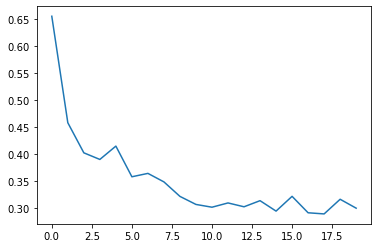

In [108]:
plt.plot(model_train.history["val_loss"])

female


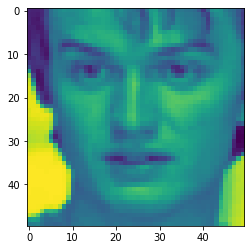

female


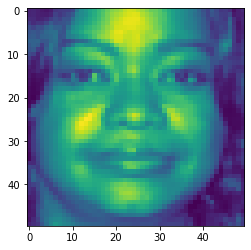

female


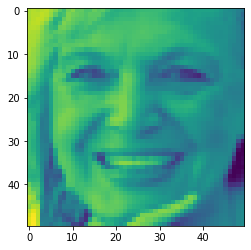

female


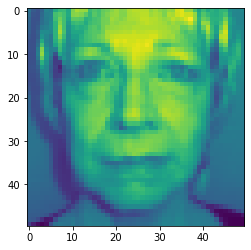

male


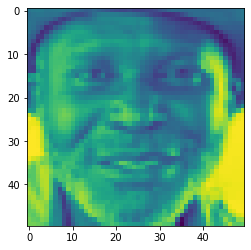

female


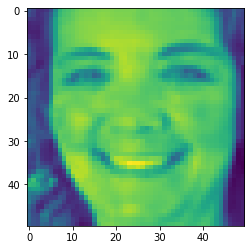

female


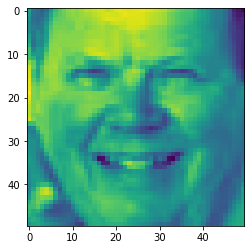

female


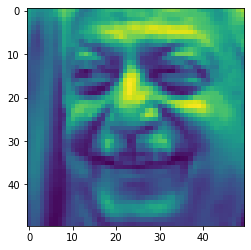

female


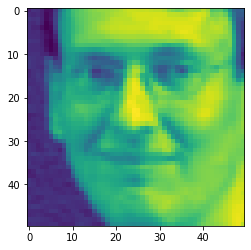

female


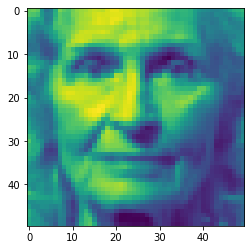

female


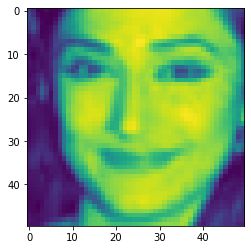

male


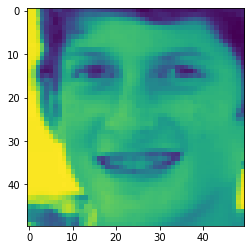

female


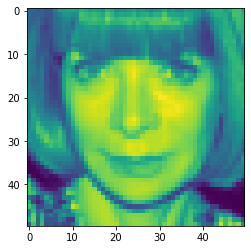

male


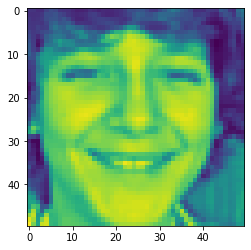

male


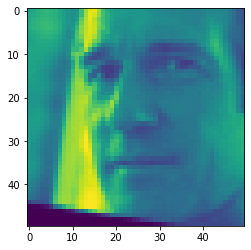

female


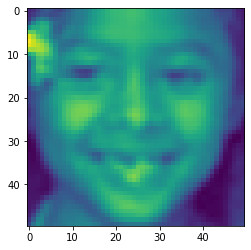

female


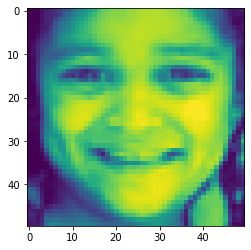

female


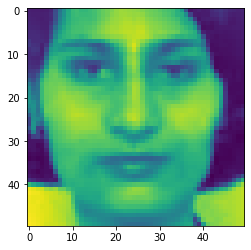

male


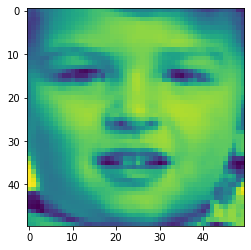

female


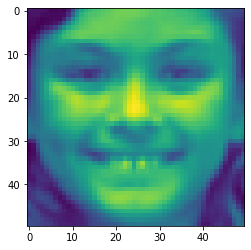

male


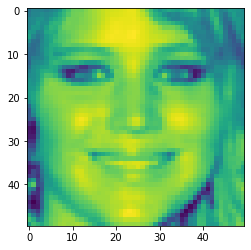

female


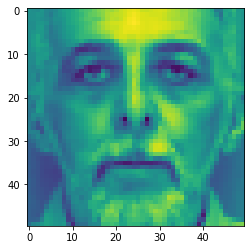

female


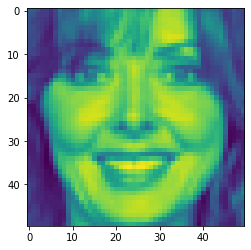

female


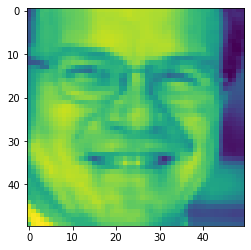

male


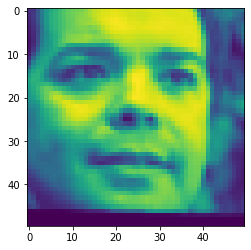

male


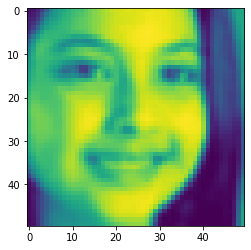

male


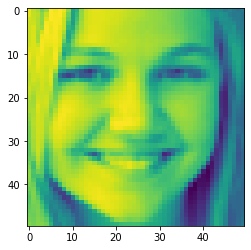

female


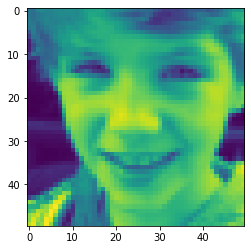

female


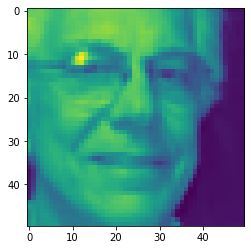

KeyboardInterrupt: 

In [109]:
for i in range(y_test.shape[0]):
    if np.argmax(y_test[i])==0:
        print("male")
    else:
        print("female")
    plt.imshow(x_test_reshaped[i])#,cmap="Greys"
    plt.show()
    time.sleep( 3 )

## submit vector of labels(1 or 0)
## search other options (classifiers) besides cnn and mlp 
### (try svm, hyperparameters linear svm - C look at the weight vector (eye region and mouth weights will influence on the ethnicity and gender classification), nonlinear svm - C,gamma(rbf))
